<a href="https://colab.research.google.com/github/anafer25/Van-der-Waals-Gas-Simulator/blob/main/Van_der_Waals_Gas_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

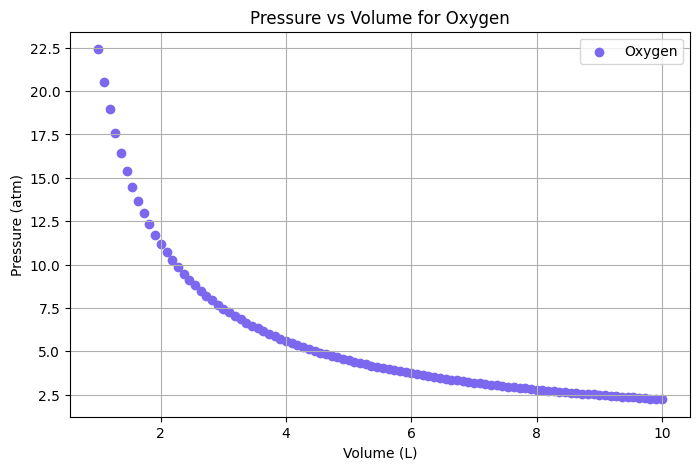

In [2]:
import numpy as np
import matplotlib.pyplot as plt

R = 0.082  # universal gas constant (L·atm/(mol·K))


class Gas:
    '''
    Stores Van der Waals constants a and b for a specific gas.
    '''

    def __init__(self, a: float, b: float) -> None:
        self.__a = a  # attraction parameter
        self.__b = b  # volume exclusion parameter

    def get_a(self) -> float:
        return self.__a

    def get_b(self) -> float:
        return self.__b


class VanDerWaalsCalculator:
    '''
    Calculates pressure using the Van der Waals equation for a given Gas.
    '''

    @staticmethod
    def calculate_pressure(
        gas: Gas,
        Vmin: float,
        Vmax: float,
        num_points: int,
        T: float,
        n: float
    ) -> tuple[np.ndarray, np.ndarray]:
        '''
        Calculate pressure for a range of volumes.

        Returns:
            pressures: np.ndarray of pressures
            volumes: np.ndarray of volumes
        '''
        volumes = np.linspace(Vmin, Vmax, num_points)
        pressures = []

        for V in volumes:
            if V > gas.get_b():
                P = (R * T) / (V - gas.get_b()) - (gas.get_a() * n**2) / (V**2)
                pressures.append(P)
            else:
                pressures.append(np.nan)  # skip unphysical volumes

        return np.array(pressures), volumes


class GraphRoutines:
    '''Contains static method to plot pressure vs. volume graphs.
    '''

    @staticmethod
    def plot_pressure_volume(
        pressures: np.ndarray,
        volumes: np.ndarray,
        gas_name: str = "Gas",
        x_label: str = "Volume (L)",
        y_label: str = "Pressure (atm)",
        color: str = "mediumslateblue"
    ) -> None:
        plt.figure(figsize=(8, 5))
        plt.scatter(volumes, pressures, color=color, label=gas_name)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(f"Pressure vs Volume for {gas_name}")
        plt.grid(True)
        plt.legend()
        plt.show()


if __name__ == "__main__":
    # example: Oxygen
    oxygen = Gas(a=0.027, b=0.0024)

    pressures, volumes = VanDerWaalsCalculator.calculate_pressure(
        oxygen, Vmin=1, Vmax=10, num_points=100, T=273, n=1
    )

    GraphRoutines.plot_pressure_volume(pressures, volumes, gas_name="Oxygen")

